### 1. Import Libraries and Dataset

In [2]:
# Import visualization libraries

import plotly.express as px # simple and interactive plots
import plotly.graph_objects as go # customizable and advanced visualizations
import plotly.figure_factory as ff # complex and specialized visualizations
import plotly.subplots as make_subplots # function to make subplots in Plotly, make arranging multiple plots together available

import matplotlib.pyplot as plt # traditional 2D plotting
%matplotlib inline
# display plots directly in Jupyter notebook
import seaborn as sns # attractive statistical graphics (built on top of Matplotlib)

In [3]:
# Import data processing libraries

import numpy as np
import pandas as pd

In [4]:
# Import EDA supporting library

!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [5]:
# Import dataset

df = pd.read_csv('/Users/ellia.hsieh/Documents/GitHub/strategic-partner-identification/data/02-processed/processed-sleep-apnea.csv')

### 2. Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NCT Number                  1717 non-null   object
 1   Study Title                 1717 non-null   object
 2   Study URL                   1717 non-null   object
 3   Study Status                1717 non-null   object
 4   Brief Summary               1717 non-null   object
 5   Study Results               1717 non-null   bool  
 6   Conditions                  1717 non-null   object
 7   Interventions               1717 non-null   object
 8   Intervention Types          1717 non-null   object
 9   Primary Outcome Measures    1717 non-null   object
 10  Secondary Outcome Measures  1337 non-null   object
 11  Other Outcome Measures      156 non-null    object
 12  Combined Outcome Measures   1717 non-null   object
 13  Sponsor                     1717 non-null   obje

In [7]:
# Readjust data type

df['Study Status'] = df['Study Status'].astype('category')
df['Enrollment'] = df['Enrollment'].fillna(0).astype(int)
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Completion Date'] = pd.to_datetime(df['Completion Date'], errors='coerce')
df['Last Update Posted'] = pd.to_datetime(df['Last Update Posted'], errors='coerce')
df['Sex'] = df['Sex'].astype('category')
df['Phases'] = df['Phases'].astype('category')
df['Study Type'] = df['Study Type'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   NCT Number                  1717 non-null   object        
 1   Study Title                 1717 non-null   object        
 2   Study URL                   1717 non-null   object        
 3   Study Status                1717 non-null   category      
 4   Brief Summary               1717 non-null   object        
 5   Study Results               1717 non-null   bool          
 6   Conditions                  1717 non-null   object        
 7   Interventions               1717 non-null   object        
 8   Intervention Types          1717 non-null   object        
 9   Primary Outcome Measures    1717 non-null   object        
 10  Secondary Outcome Measures  1337 non-null   object        
 11  Other Outcome Measures      156 non-null    object      

### 3. Univariate Analysis

#### 3-1. 'Study Status'

In [8]:
# Get the value counts

study_status_counts = df['Study Status'].value_counts()

# Manually sort order

custom_order = ['NOT_YET_RECRUITING', 'ENROLLING_BY_INVITATION', 'RECRUITING', 'ACTIVE_NOT_RECRUITING', 'COMPLETED', 'TERMINATED', 'WITHDRAWN', 'SUSPENDED', 'UNKNOWN']

study_status_counts = study_status_counts.reindex(custom_order)
study_status_counts

Study Status
NOT_YET_RECRUITING          63
ENROLLING_BY_INVITATION     10
RECRUITING                 210
ACTIVE_NOT_RECRUITING       41
COMPLETED                  988
TERMINATED                 124
WITHDRAWN                   68
SUSPENDED                    8
UNKNOWN                    205
Name: count, dtype: int64

In [9]:
# # Create a bar plot using seaborn

# plt.figure(figsize=(12,4))
# sns.barplot(x=study_status_counts.index, y=study_status_counts.values, palette='crest', order=study_status_counts.index)

# # Add labels and title

# plt.xlabel('Study Status', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.title('Study Status Distribution (Sort by Process)', fontsize=15)

# # Adjust x labels

# plt.xticks(rotation=45, ha='right', fontsize=10)

# plt.show()

#### 3-2. 'Brief Summary'

In [10]:
df['Brief Summary'].unique()

array(['Mouth breathing is associated with increased airway resistance, pharyngeal collapsibility, and obstructive sleep apnea (OSA) severity. It is commonly believed that closing the mouth can mitigate the negative effects of mouth breathing during sleep. However, we propose that mouth breathing serves as an essential route bypassing obstruction along the nasal route (e.g., velopharynx). The present study investigates the role of mouth breathing as an essential route in some OSA patients and its association with upper airway anatomical factors.\n\nParticipants underwent drug-induced sleep endoscopy (DISE) with simultaneous pneumotach airflow measurements through the nose and mouth separately. During the DISE procedure, alternating mouth closure (every other breath) cycles were performed during flow-limited breathing.\n\nWe evaluated the overall effect mouth closure on inspiratory airflow, and the change in inspiratory airflow with mouth closure across three mouth-breathing quantiles. 

#### 3-3. 'Study Results'

In [11]:
df['Study Results'].value_counts()

Study Results
False    1399
True      318
Name: count, dtype: int64

#### 3-4. 'Intervention', 'Intervention Types'

In [12]:
df['Intervention Types'].value_counts()

Intervention Types
DEVICE                                                759
DRUG                                                  241
OTHER                                                 213
BEHAVIORAL                                            122
PROCEDURE                                             120
OTHER, DEVICE                                          55
DIAGNOSTIC_TEST                                        35
DEVICE, DRUG                                           23
OTHER, DRUG                                            22
DEVICE, BEHAVIORAL                                     22
OTHER, BEHAVIORAL                                      15
OTHER, PROCEDURE                                       14
BEHAVIORAL, PROCEDURE                                   7
DEVICE, PROCEDURE                                       7
DIETARY_SUPPLEMENT                                      6
OTHER, DEVICE, DRUG                                     6
DEVICE, DIAGNOSTIC_TEST                              

In [14]:
intv_types_exploded = df['Intervention Types'].str.split(', ').explode()
intv_types_counts = intv_types_exploded.value_counts(ascending=False)

print(intv_types_counts) # clinical trials numbers for each interverence

Intervention Types
DEVICE                 892
OTHER                  339
DRUG                   309
BEHAVIORAL             179
PROCEDURE              167
DIAGNOSTIC_TEST         50
DIETARY_SUPPLEMENT      12
COMBINATION_PRODUCT      6
BIOLOGICAL               3
RADIATION                1
GENETIC                  1
Name: count, dtype: int64


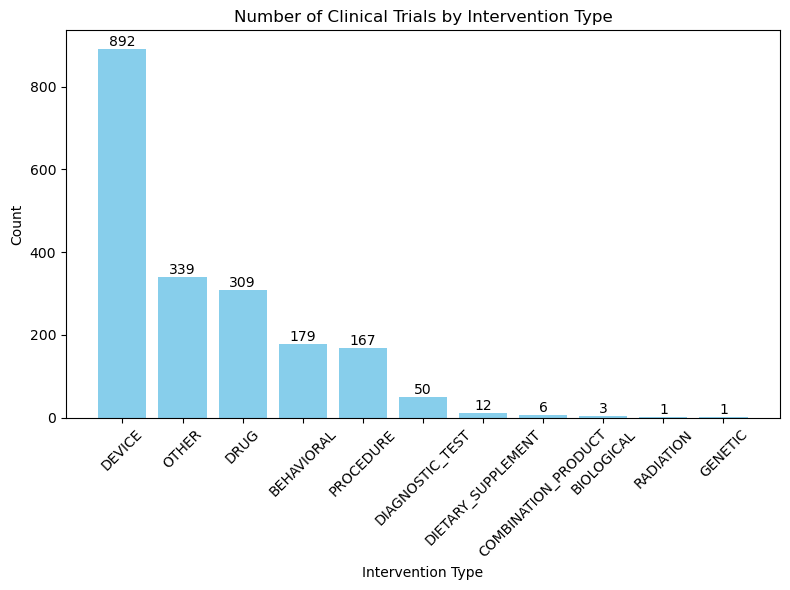

In [28]:
# Create a figure and explicitly plot vertical bars

plt.figure(figsize=(8,6))

# Plot vertical bar chart using plt.bar

bars = plt.bar(intv_types_counts.index, intv_types_counts.values, color='skyblue')

# Add labels and title

plt.ylabel('Count')
plt.xlabel('Intervention Type')
plt.title('Number of Clinical Trials by Intervention Type')

# Rotate x-axis labels for better readability

plt.xticks(rotation=45, ha='center')

# Add the count on top of each bar

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adjust layout to ensure everything fits

plt.tight_layout()

# Show the plot

plt.show()

In [37]:
# See what's in 'OTHER'

# Set display options to show all rows

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)  # Show full column width

df[df['Intervention Types'].str.contains('OTHER')]['Interventions'].str.extract(r'OTHER:\s*([^|]+)')

,0
0,Mouth closure
3,individualised treatment plan (VitalCare) and associated remote medical monitoring
6,placebo
11,CPAP therapy withdrawal
12,Placebo
34,Standard care for OSA
37,controlled exercises
42,Resistance training
45,Training
47,Sound stimulation


Seems like there are misclassificaions under 'OTHER', will adjust them manually back in `01-data-preprocessing.ipynb`

#### 3-5. 'Combined Outcome Measures'

#### 3-6. Sponsor and Collaborators: get list to create mapping file

In [14]:
df['Sponsor'].unique()

array(["Brigham and Women's Hospital",
       'Royal College of Surgeons, Ireland', 'LivaNova',
       'Air Liquide Santé International', 'Tyco Healthcare Group',
       'Papworth Hospital NHS Foundation Trust',
       'Taipei Medical University', 'Fundación Neumologica Colombiana',
       'Guangzhou Institute of Respiratory Disease',
       "Guy's and St Thomas' NHS Foundation Trust", 'University of Crete',
       'University of Zurich', 'Chinese University of Hong Kong',
       'University of British Columbia', 'ResMed',
       'University Hospital Ostrava',
       'Heart and Diabetes Center North-Rhine Westfalia',
       "Sheffield Children's NHS Foundation Trust",
       'University Hospitals of North Midlands NHS Trust',
       "Università degli Studi 'G. d'Annunzio' Chieti e Pescara",
       'Sheffield Teaching Hospitals NHS Foundation Trust',
       'Invicta Medical Inc.', 'NovaResp Technologies Inc',
       'Nykøbing Falster County Hospital',
       'University Hospital, Grenob

In [15]:
df['Collaborators'].unique()

array(['Massachusetts Eye and Ear Infirmary|National Heart, Lung, and Blood Institute (NHLBI)',
       'University College Dublin|Connolly Hospital Blanchardstown', nan,
       'Clinact', 'Universidad de la Sabana',
       'S. Spirito Hospital, Pescara, Italy',
       'Sheffield Hallam University',
       'University College London Hospitals',
       'Swiss National Science Foundation',
       'Vanderbilt University Medical Center',
       'Adelaide Institute for Sleep Health, Flinders University',
       'University of Copenhagen|Center of Expertise, Oringe Psychiatric Hospital,Vordingborg, Denmark',
       'Dreem|AGIR à Dom', 'WellO2 Oy|University of Turku',
       'National Heart, Lung, and Blood Institute (NHLBI)',
       'Case Western Reserve University',
       'National Institute on Aging (NIA)', 'Apnimed', 'Asate LLC, DE',
       'Ziekenhuis Oost-Limburg', 'George Washington University',
       'ResMed Foundation', 'ResMed',
       'Centre National de la Recherche Scientifique,

In [16]:
df['Sponsor and Collaborators'] = df['Sponsor'] + '|' + df['Collaborators'].fillna('')

sponsor_collab_exploded = df['Sponsor and Collaborators'].str.split('|').explode()
sponsor_collab_count = sponsor_collab_exploded.value_counts()

sponsor_collab_count

Sponsor and Collaborators
                                                     1159
National Heart, Lung, and Blood Institute (NHLBI)      81
Fisher and Paykel Healthcare                           64
ResMed                                                 62
Brigham and Women's Hospital                           52
                                                     ... 
Coastal Carolina University                             1
inHealth Medical Services, Inc.                         1
University of Minnesota                                 1
Arizona State University (ASU)                          1
National Library of Medicine (NLM)                      1
Name: count, Length: 1069, dtype: int64

In [17]:
print(type(sponsor_collab_count))

<class 'pandas.core.series.Series'>


In [18]:
# Convert the counts to a DataFrame to observe all data

sponsor_collab_count = sponsor_collab_count.to_frame()

In [19]:
sponsor_collab_count

,count
Sponsor and Collaborators,
,1159
"National Heart, Lung, and Blood Institute (NHLBI)",81
Fisher and Paykel Healthcare,64
ResMed,62
Brigham and Women's Hospital,52
...,...
Coastal Carolina University,1
"inHealth Medical Services, Inc.",1
University of Minnesota,1


In [20]:
# # Display the full DataFrame

# pd.set_option('display.max_rows', None) # show all rows
# pd.set_option('display.max_columns', None) # show all columns
# pd.set_option('display.width', None) # adjust width to fit all content

# sponsor_collab_count

In [21]:
sponsor_collab_count.index.unique()

Index(['', 'National Heart, Lung, and Blood Institute (NHLBI)',
       'Fisher and Paykel Healthcare', 'ResMed',
       'Brigham and Women's Hospital', 'University Hospital, Grenoble',
       'VA Office of Research and Development', 'Philips Respironics',
       'University of California, San Diego',
       'National Institutes of Health (NIH)',
       ...
       'Leonard Davis Institute of Health Economics',
       'Association Nationale pour les Traitements A Domicile, les Innovations et la Recherche',
       'Hospital Universitario Principe de Asturias', 'Shao-Ping Nie',
       'State University of New York - Downstate Medical Center',
       'Coastal Carolina University', 'inHealth Medical Services, Inc.',
       'University of Minnesota', 'Arizona State University (ASU)',
       'National Library of Medicine (NLM)'],
      dtype='object', name='Sponsor and Collaborators', length=1069)

In [22]:
# Get full list for the unique values

unique_sponsor_collab = sponsor_collab_count.index.unique()
unique_sponsor_collab = unique_sponsor_collab.to_list()

print(unique_sponsor_collab)

['', 'National Heart, Lung, and Blood Institute (NHLBI)', 'Fisher and Paykel Healthcare', 'ResMed', "Brigham and Women's Hospital", 'University Hospital, Grenoble', 'VA Office of Research and Development', 'Philips Respironics', 'University of California, San Diego', 'National Institutes of Health (NIH)', 'University of Michigan', 'Sociedad Española de Neumología y Cirugía Torácica', 'Chinese University of Hong Kong', 'University of Pennsylvania', 'Mayo Clinic', 'University of Chicago', 'Apnimed', 'Assistance Publique - Hôpitaux de Paris', 'ResMed Foundation', 'University of Sao Paulo', 'Johns Hopkins University', 'Fundação de Amparo à Pesquisa do Estado de São Paulo', 'University Health Network, Toronto', 'Stanford University', 'University of British Columbia', 'University of Zurich', 'University of Miami', 'National Institute on Aging (NIA)', 'Centre Hospitalier Universitaire de Saint Etienne', "Children's Hospital Medical Center, Cincinnati", 'University of Sao Paulo General Hospita

In [27]:
# Filter out empty strings and create dataframe

institutions = [inst for inst in unique_sponsor_collab if inst]
df_institutions = pd.DataFrame(institutions, columns=['Institution'])

df_institutions

,Institution
0,"National Heart, Lung, and Blood Institute (NHLBI)"
1,Fisher and Paykel Healthcare
2,ResMed
3,Brigham and Women's Hospital
4,"University Hospital, Grenoble"
...,...
1063,Coastal Carolina University
1064,"inHealth Medical Services, Inc."
1065,University of Minnesota
1066,Arizona State University (ASU)


In [28]:
# # Output the dataframe to CSV file

# import csv

# csv_file_path = '/Users/ellia.hsieh/Documents/GitHub/strategic-partner-identification/data/03-external/WIP/institutions.csv'
# df_institutions.to_csv(csv_file_path, index=False)

#### 3-7. Sex and Age

#### 3-8. Phases and Enrollment

In [24]:
df.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Intervention Types', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'Other Outcome Measures',
       'Combined Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Study Type', 'Start Date', 'Completion Date',
       'Last Update Posted', 'Locations', 'Countries',
       'Sponsor and Collaborators'],
      dtype='object')